In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

pd.set_option("display.max_columns", None)

In [2]:
loc = "C:/Users/sagic/[2] UFC_Predictor/"

file1 = 'ufc_fighters_stats.csv'
file2 = 'ufc_fights_stats.csv'

df1 = pd.read_csv(loc+file1)
df2 = pd.read_csv(loc+file2)

# [ in-process ] Exploratory Data Analysis

### [ done ] ufc_fighters_stats.csv exploration

In [3]:
df = df1.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Unnamed: 14'], axis=1)
df.tail()

,name,wins,losses,draws,Height:,Weight:,Reach:,STANCE:,DOB:,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
7795,Joao Zeferino,21,9.0,0,"5' 11""",170 lbs.,--,Orthodox,"Jan 15, 1986",0.83,36%,2.60,48%,0.50,5%,50%,1.0
7796,Zhang Tiequan,15,4.0,0,"5' 8""",155 lbs.,"69""",Orthodox,"Jul 25, 1978",1.23,36%,2.14,51%,1.95,58%,75%,3.4
7797,Carlos Zevallos,3,NaN,-0,"6' 0""",205 lbs.,--,Orthodox,--,4.36,65%,2.28,68%,0.00,0%,100%,0.0
7798,Zach Zane,10,7.0,0,"5' 7""",145 lbs.,"69""",Southpaw,"Dec 14, 1989",0.87,56%,6.67,20%,0.00,0%,26%,0.0
7799,Roger Zapata,4,NaN,-0,"5' 11""",170 lbs.,--,Southpaw,"May 09, 1986",2.60,51%,2.13,36%,0.00,0%,81%,1.4


## Column's Legend:
****
* SLpM - Significant Strikes Landed per Minute
* Str. Acc. - Significant Striking Accuracy
* SApM - Significant Strikes Absorbed per Minute
* Str. Def. - Significant Strike Defence (the % of opponents strikes that did not land)
* TD Avg. - Average Takedowns Landed per 15 minutes
* TD Acc. - Takedown Accuracy
* TD Def. - Takedown Defense (the % of opponents TD attempts that did not land)
* Sub. Avg. - Average Submissions Attempted per 15 minutes

In [4]:
df.shape

(7800, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        7800 non-null   object 
 1   wins        7800 non-null   int64  
 2   losses      4484 non-null   float64
 3   draws       7800 non-null   object 
 4   Height:     7800 non-null   object 
 5   Weight:     7800 non-null   object 
 6   Reach:      7800 non-null   object 
 7   STANCE:     6138 non-null   object 
 8   DOB:        7800 non-null   object 
 9   SLpM:       7800 non-null   float64
 10  Str. Acc.:  7800 non-null   object 
 11  SApM:       7800 non-null   float64
 12  Str. Def:   7800 non-null   object 
 13  TD Avg.:    7800 non-null   float64
 14  TD Acc.:    7800 non-null   object 
 15  TD Def.:    7800 non-null   object 
 16  Sub. Avg.:  7800 non-null   float64
dtypes: float64(5), int64(1), object(11)
memory usage: 1.0+ MB


In [6]:
df = df.rename(columns = {'Height:':'height','Weight:':'weight','Reach:':'reach','STANCE:':'stance','DOB:':'age'})
df.head(5)

,name,wins,losses,draws,height,weight,reach,stance,age,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
0,Dylan Andrews,18,7.0,0,"6' 1""",185 lbs.,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,"5' 8""",155 lbs.,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,"5' 2""",115 lbs.,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,"5' 7""",145 lbs.,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,18,1.0,0,"5' 8""",145 lbs.,"70""",Southpaw,"Jan 22, 1994",3.31,42%,2.22,66%,1.41,50%,76%,0.4


### [ done ] height pre-processing

In [7]:
def get_height(item):
    
    '''return height in cm'''
    
    item = str(item)
    
    if item[0] == '-':
        return None
    else:
        return round(30.48 * float(item[0:item.find("'")]) + 2.54 * float(item[item.find("'")+1:item.find('"')]),2)

In [8]:
for i in range(0,len(df['height'])):
    df.loc[i,'height'] = get_height(df.loc[i,'height']) 
    
df.head()    

,name,wins,losses,draws,height,weight,reach,stance,age,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
0,Dylan Andrews,18,7.0,0,185.42,185 lbs.,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,155 lbs.,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,115 lbs.,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,145 lbs.,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,18,1.0,0,172.72,145 lbs.,"70""",Southpaw,"Jan 22, 1994",3.31,42%,2.22,66%,1.41,50%,76%,0.4


#### replacing null values with mean >

In [9]:
height_list = df['height'][df['height']!=None]
mean_height = np.round(np.mean(height_list),2)
df['height'] = df['height'].apply(lambda x: mean_height if x==None else x )
df.head()

,name,wins,losses,draws,height,weight,reach,stance,age,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
0,Dylan Andrews,18,7.0,0,185.42,185 lbs.,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,155 lbs.,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,115 lbs.,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,145 lbs.,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,18,1.0,0,172.72,145 lbs.,"70""",Southpaw,"Jan 22, 1994",3.31,42%,2.22,66%,1.41,50%,76%,0.4


### [ done ] weight 

In [10]:
def get_weight(item):
    
    '''return weight in kg'''
    
    item = str(item)
    
    if item[0] == '-':
        return None
    else:
        return 0.45 * float(item[0:item.find('lbs.')])

In [11]:
for i in range(0,len(df['weight'])):
    df.loc[i,'weight'] = get_weight(df.loc[i,'weight']) 
    
df.head()    

,name,wins,losses,draws,height,weight,reach,stance,age,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
0,Dylan Andrews,18,7.0,0,185.42,83.25,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,18,1.0,0,172.72,65.25,"70""",Southpaw,"Jan 22, 1994",3.31,42%,2.22,66%,1.41,50%,76%,0.4


#### replacing null values with mean >

In [12]:
mean_weight = np.round( np.mean(df['weight']) )
df['weight'] = df['weight'].apply(lambda x: mean_weight if x==None else x )
df.head()

,name,wins,losses,draws,height,weight,reach,stance,age,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
0,Dylan Andrews,18,7.0,0,185.42,83.25,"74""",Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,"68""",Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,"62""",Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,--,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,18,1.0,0,172.72,65.25,"70""",Southpaw,"Jan 22, 1994",3.31,42%,2.22,66%,1.41,50%,76%,0.4


### [ done ] Reach

In [13]:
df.reach.unique()

array(['74"', '68"', '62"', '--', '70"', '71"', '72"', '75"', '73"',
       '80"', '66"', '77"', '76"', '63"', '69"', '78"', '79"', '67"',
       '65"', '64"', '81"', '61"', '59"', '60"', '84"', '82"', '58"',
       '83"'], dtype=object)

In [14]:
def get_reach(item):
    
    '''return reach in cm'''
    
    item = str(item)
    
    if item[0] == '-':
        return None
    else:
        return 2.54 * float(item[0:item.find('"')])

In [15]:
for i in range(0,len(df['reach'])):
    df.loc[i,'reach'] = get_reach(df.loc[i,'reach']) 
    
df.head()   

,name,wins,losses,draws,height,weight,reach,stance,age,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
0,Dylan Andrews,18,7.0,0,185.42,83.25,187.96,Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,172.72,Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,157.48,Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,None,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,18,1.0,0,172.72,65.25,177.8,Southpaw,"Jan 22, 1994",3.31,42%,2.22,66%,1.41,50%,76%,0.4


#### replacing null values with "standard reach" ( =mean(reach/height)*height ) >

In [16]:
def get_std_reach(item, height, reach_list, height_list):
    
    '''return "standard reach" ( =mean(reach/height)*height )'''
    
    return round(height*np.mean(reach_list/height_list),2)

In [17]:
for i in range(0,len(df['reach'])):
    
    if df.loc[i, 'reach'] == None:
        df.loc[i, 'reach'] = get_std_reach(df.loc[i, 'reach'],df.loc[i,'height'], df['reach'], df['height']) 
    
df.head()   

,name,wins,losses,draws,height,weight,reach,stance,age,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
0,Dylan Andrews,18,7.0,0,185.42,83.25,187.96,Switch,"Nov 15, 1979",2.21,50%,2.72,46%,2.83,50%,57%,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,172.72,Orthodox,"Nov 14, 1990",2.46,50%,4.14,58%,0.41,25%,60%,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,157.48,Orthodox,"Jun 08, 1995",3.67,31%,6.87,57%,1.00,25%,0%,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,174.33,NaN,"Dec 29, 1988",0.00,0%,0.00,0%,0.00,0%,0%,0.0
4,Arnold Allen,18,1.0,0,172.72,65.25,177.8,Southpaw,"Jan 22, 1994",3.31,42%,2.22,66%,1.41,50%,76%,0.4


### [ done ] stance

In [18]:
df.stance.unique()

array(['Switch', 'Orthodox', nan, 'Southpaw', 'Open Stance', 'Sideways'],
      dtype=object)

Most common stance:


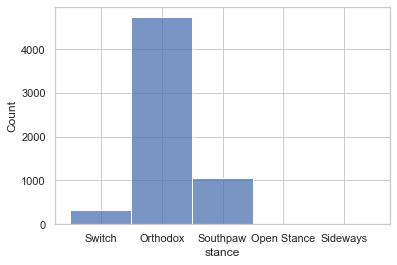

In [19]:
import seaborn as sns
sns.set_theme(style="whitegrid")

print('Most common stance:')
ax = sns.histplot(x=df["stance"])

#### replacing null with 'Orthodox'(= most common stance)

In [20]:
df['stance'] = df['stance'].apply(lambda x: 'Orthodox' if str(x)=='nan' else x )
df.stance.unique()

array(['Switch', 'Orthodox', 'Southpaw', 'Open Stance', 'Sideways'],
      dtype=object)

### [ done ] Age

In [21]:
df.age.unique()

array(['Nov 15, 1979', 'Nov 14, 1990', 'Jun 08, 1995', ...,
       'Jul 25, 1978', 'Dec 14, 1989', 'May 09, 1986'], dtype=object)

In [22]:
def get_age(item):
    
    '''return age (instead of date of birth)'''
    
    from datetime import date,timedelta
    
    item = str(item)
    current_date = date.today().year
    
    if item[0] == '-':
        return None
    else:
        return (current_date - int(item[item.find(',')+1:]))

In [23]:
for i in range(0,len(df['age'])):
    
    if df.loc[i, 'age'] != None:
        df.loc[i, 'age'] = get_age(df.loc[i, 'age']) 
    
df.age.unique()  

array([43, 32, 27, 34, 28, 49, 29, 50, 44, 46, 38, 39, 57, 33, 48, 35,
       None, 31, 36, 45, 55, 52, 26, 37, 40, 30, 41, 42, 47, 51, 25, 54,
       21, 23, 24, 53, 56, 58, 59, 68, 64, 63, 20, 22, 61, 18, 60, 79, 62,
       66], dtype=object)

#### replacing null with standard age >

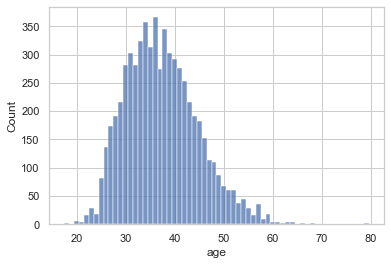

In [24]:
ax = sns.histplot(x=df["age"])

In [25]:
def get_std_age(item, age_list):
    
    '''return standrd age per weight class'''
    
    return round(np.mean(age_list),2)

In [26]:
for i in range(0,len(df['age'])):
    
    if df.loc[i, 'age'] == None:
        df.loc[i, 'age'] = get_std_age(df.loc[i, 'age'], df['age']) 
    
df.age.unique()  

array([43, 32, 27, 34, 28, 49, 29, 50, 44, 46, 38, 39, 57, 33, 48, 35,
       37.4, 31, 36, 45, 55, 52, 26, 37, 40, 30, 41, 42, 47, 51, 25, 54,
       21, 23, 24, 53, 56, 58, 59, 68, 64, 63, 20, 22, 61, 18, 60, 79, 62,
       66], dtype=object)

### [ done ] statistics % pre-processing

In [27]:
for i in range(0,len(df)):
    
    item = str(df.loc[i,'Str. Acc.:'])
    df.loc[i,'Str. Acc.:'] = float(item[0:item.find('%')])/100
    
    item = str(df.loc[i,'Str. Def:'])
    df.loc[i,'Str. Def:'] = float(item[0:item.find('%')])/100
    
    item = str(df.loc[i,'TD Acc.:'])
    df.loc[i,'TD Acc.:'] = float(item[0:item.find('%')])/100
    
    item = str(df.loc[i,'TD Def.:'])
    df.loc[i,'TD Def.:'] = float(item[0:item.find('%')])/100
    

In [28]:
df.head()

,name,wins,losses,draws,height,weight,reach,stance,age,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
0,Dylan Andrews,18,7.0,0,185.42,83.25,187.96,Switch,43,2.21,0.5,2.72,0.46,2.83,0.5,0.57,0.4
1,Rafael Alves,20,1.0,-0,172.72,69.75,172.72,Orthodox,32,2.46,0.5,4.14,0.58,0.41,0.25,0.6,1.2
2,Rayanne Amanda,11,6.0,0,157.48,51.75,157.48,Orthodox,27,3.67,0.31,6.87,0.57,1.00,0.25,0.0,0.0
3,Anthony Avila,13,5.0,0,170.18,65.25,174.33,Orthodox,34,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4,Arnold Allen,18,1.0,0,172.72,65.25,177.8,Southpaw,28,3.31,0.42,2.22,0.66,1.41,0.5,0.76,0.4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        7800 non-null   object 
 1   wins        7800 non-null   int64  
 2   losses      4484 non-null   float64
 3   draws       7800 non-null   object 
 4   height      7800 non-null   float64
 5   weight      7800 non-null   float64
 6   reach       7800 non-null   object 
 7   stance      7800 non-null   object 
 8   age         7800 non-null   object 
 9   SLpM:       7800 non-null   float64
 10  Str. Acc.:  7800 non-null   object 
 11  SApM:       7800 non-null   float64
 12  Str. Def:   7800 non-null   object 
 13  TD Avg.:    7800 non-null   float64
 14  TD Acc.:    7800 non-null   object 
 15  TD Def.:    7800 non-null   object 
 16  Sub. Avg.:  7800 non-null   float64
dtypes: float64(7), int64(1), object(9)
memory usage: 1.0+ MB


### [ done ] losses pre-processing

In [30]:
i = 0
for item in df['losses']:
    if str(item) == 'nan':
        df.loc[i,'losses'] = int(0)
    else:    
        df.loc[i,'losses'] = int(df.loc[i,'losses'])
    i += 1
    
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        7800 non-null   object 
 1   wins        7800 non-null   int64  
 2   losses      7800 non-null   float64
 3   draws       7800 non-null   object 
 4   height      7800 non-null   float64
 5   weight      7800 non-null   float64
 6   reach       7800 non-null   object 
 7   stance      7800 non-null   object 
 8   age         7800 non-null   object 
 9   SLpM:       7800 non-null   float64
 10  Str. Acc.:  7800 non-null   object 
 11  SApM:       7800 non-null   float64
 12  Str. Def:   7800 non-null   object 
 13  TD Avg.:    7800 non-null   float64
 14  TD Acc.:    7800 non-null   object 
 15  TD Def.:    7800 non-null   object 
 16  Sub. Avg.:  7800 non-null   float64
dtypes: float64(7), int64(1), object(9)
memory usage: 1.0+ MB


## [ in-progress ] ufc_fights_stats.csv exploration

In [31]:
df = df2.drop(['Unnamed: 0'], axis = 1)
df.head()

,W/L,Fighter,Kd,Str,Td,Sub,Weight class,Method,Round,Time
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO Punches,3,4:23
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC,3,5:00
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC,3,5:00
3,win,Roman Kopylov:Alessio Di Chirico,1:0,59:39,0:0,0:0,Middleweight,KO/TKO Punches,3,1:09
4,win,William Gomis:Jarno Errens,0:0,32:20,3:0,0:1,Featherweight,U-DEC,3,5:00


In [32]:
df.shape

(6804, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   W/L           6804 non-null   object
 1   Fighter       6804 non-null   object
 2   Kd            6804 non-null   object
 3   Str           6804 non-null   object
 4   Td            6804 non-null   object
 5   Sub           6804 non-null   object
 6   Weight class  6804 non-null   object
 7   Method        6804 non-null   object
 8   Round         6804 non-null   int64 
 9   Time          6804 non-null   object
dtypes: int64(1), object(9)
memory usage: 531.7+ KB


## [ in-progress ] Feature Engineering

### [ done ] feature Win/Lose fighter column

In [34]:
df['w_fighter'] = None
df['l_fighter'] = None

i = 0
for item in df['Fighter']:
    df.loc[i,'w_fighter'] = item[0:item.find(':')]
    df.loc[i,'l_fighter'] = item[item.find(':')+1:]
    i += 1
    
df.head(3)    

,W/L,Fighter,Kd,Str,Td,Sub,Weight class,Method,Round,Time,w_fighter,l_fighter
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO Punches,3,4:23,Ciryl Gane,Tai Tuivasa
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC,3,5:00,Robert Whittaker,Marvin Vettori
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC,3,5:00,Nassourdine Imavov,Joaquin Buckley


#### [ done ] drop nc/draw rows >

In [35]:
df = (df[df['W/L'] == 'win']).reset_index(drop=True)
df.shape

(6683, 12)

### [ done ] feature stats columns

In [38]:
df['w_kd'] = None
df['l_kd'] = None

i = 0
for item in df['Kd']:
    df.loc[i,'w_kd'] = item[0:item.find(':')]
    df.loc[i,'l_kd'] = item[item.find(':')+1:]
    i += 1
    
df['w_str'] = None
df['l_str'] = None

i = 0
for item in df['Str']:
    df.loc[i,'w_str'] = item[0:item.find(':')]
    df.loc[i,'l_str'] = item[item.find(':')+1:]
    i += 1

df['w_td'] = None
df['l_td'] = None

i = 0
for item in df['Td']:
    df.loc[i,'w_td'] = item[0:item.find(':')]
    df.loc[i,'l_td'] = item[item.find(':')+1:]
    i += 1
      
        
df['w_sub'] = None
df['l_sub'] = None

i = 0
for item in df['Sub']:
    df.loc[i,'w_sub'] = item[0:item.find(':')]
    df.loc[i,'l_sub'] = item[item.find(':')+1:]
    i += 1
                  
df.tail(3)

,W/L,Fighter,Kd,Str,Td,Sub,Weight class,Method,Round,Time,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub
6680,win,Aleksandra Albu:Kailin Curran,0:0,82:86,5:1,0:0,Women's Strawweight,U-DEC,3,5:00,Aleksandra Albu,Kailin Curran,0,0,82,86,5,1,0,0
6681,win,Jarred Brooks:Eric Shelton,0:0,27:31,5:1,1:1,Flyweight,S-DEC,3,5:00,Jarred Brooks,Eric Shelton,0,0,27,31,5,1,1,1
6682,win,Drew Dober:Joshua Burkman,1:0,15:11,0:0,0:0,Lightweight,KO/TKO Punch,1,3:04,Drew Dober,Joshua Burkman,1,0,15,11,0,0,0,0


### [ in-progress ] feature Win/Lose streak column

NameError: name 'djhl' is not defined

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>